In [13]:
# Parameters
run = "07_autoregression"
base_folder = "human_like_manager"
target = "punishments"
test = "t-test_paired"
selection = {"architecture": "node+edge"}
order = ["node", "node+edge"]
pairs = [["node", "node+edge"]]


In [14]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

data_folder = os.path.join('../../data', base_folder, run)
plot_folder = f'plots/{base_folder}_{run}'

make_dir(plot_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def _plot_heatmap(data, x, y, values, normalise=True):
    dfg = data.groupby([x,y])[values].sum()
    dfg = dfg.reset_index()
    if normalise:
        dfg[values] = dfg[values] / dfg.groupby([x])[values].transform('sum')
    cm = dfg.pivot_table(index=x, columns=y, values=values)
    cm = cm.sort_index(ascending=False)
    sns.heatmap(cm)

def merge_data(data_folder, metric_name):
    folder = os.path.join(data_folder, metric_name)
    dfs = [pd.read_parquet(os.path.join(folder, file)) for file in os.listdir(folder)]
    df = pd.concat(dfs).reset_index(drop=True)
    return df


In [16]:
metrics_df = merge_data(data_folder, 'metrics')
print(metrics_df['cv_split'].unique())
try:
    confusion_matrix_df = merge_data(data_folder, 'confusion_matrix')
except:
    confusion_matrix_df = None
metrics_df['shuffle_feature'] = metrics_df['shuffle_feature'].fillna('none')
labels = list(set(metrics_df.columns) - set(['job_id', 'name', 'value', 'cv_split', 'epoch', 'set', 'strategy', 'shuffle_feature', 'mask', 'n_pred']))


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]


/home/mpib/brinkmann/repros/algorithmic-institutions/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


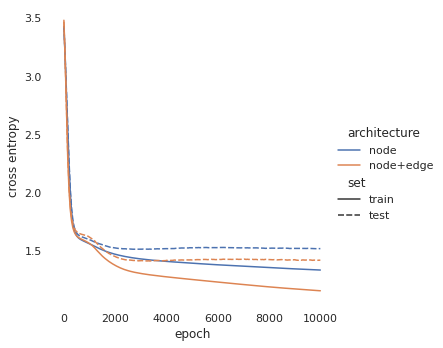

In [17]:
df = metrics_df.copy()


focus = [*labels, 'set']

sel = {
    'name': 'log_loss',
    'shuffle_feature': 'none',
}

w = pd.concat(
    (df[k].isin(v) if isinstance(v, list) else df[k] == v
    for k,v in sel.items()
    if (k not in focus) or isinstance(v, list)), axis=1
).all(1)

df = df[w]

fg = sns.relplot(
    data=df, 
    x='epoch', y='value',
    hue=focus[0] if len(focus) >= 1 else None, 
    style=focus[1] if len(focus) >= 2 else None,
    col=focus[2] if len(focus) >= 3 else None, 
    row=focus[3] if len(focus) >= 4 else None, 
    kind='line', ci=None)

fg.set(ylabel='cross entropy')

fg.savefig(os.path.join(plot_folder, 'learning_curve_model.jpg'))

/home/mpib/brinkmann/repros/algorithmic-institutions/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


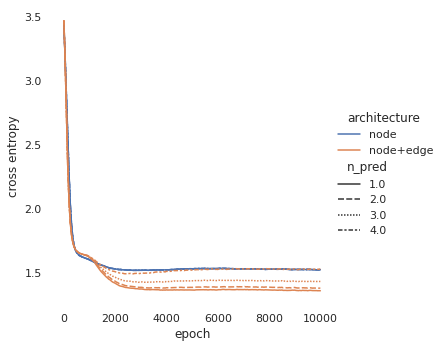

In [18]:
df = metrics_df.copy()


focus = [*labels, 'n_pred']

sel = {
    'set': 'test',
    'name': 'log_loss',
    'shuffle_feature': 'none',
}

w = pd.concat(
    (df[k].isin(v) if isinstance(v, list) else df[k] == v
    for k,v in sel.items()
    if (k not in focus) or isinstance(v, list)), axis=1
).all(1)

df = df[w]

fg = sns.relplot(
    data=df, 
    x='epoch', y='value',
    hue=focus[0] if len(focus) >= 1 else None, 
    style=focus[1] if len(focus) >= 2 else None,
    col=focus[2] if len(focus) >= 3 else None, 
    row=focus[3] if len(focus) >= 4 else None, 
    kind='line', ci=None)

fg.set(ylabel='cross entropy')

fg.savefig(os.path.join(plot_folder, 'learning_curve_model_npred.jpg'))

In [19]:
import statsmodels.formula.api as smf


df = metrics_df.copy()

w = (
    (df['name'] == 'log_loss') &
    (df['set'] == 'test') &
    (df['shuffle_feature'] == 'none')
)
df = df[w].copy()
w_max = (df['epoch'] > (0.8 * df['epoch'].max()))
df = df[w_max].copy()

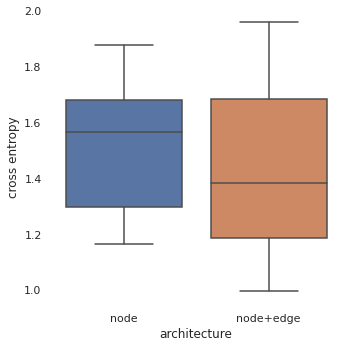

In [20]:
df = metrics_df.copy()

focus = labels

w = (
    (df['name'] == 'log_loss') &
    (df['set'] == 'test') &
    (df['shuffle_feature'] == 'none')
)
df = df[w].copy()
w_max = (df['epoch'] > (0.8 * df['epoch'].max()))
df = df[w_max].copy()


fg = sns.catplot(
    data=df, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    col=focus[2] if len(focus) >= 3 else None, 
    row=focus[3] if len(focus) >= 4 else None, 
    kind='box')

fg.set(ylabel='cross entropy')

fg.savefig(os.path.join(plot_folder, 'cross_entropy_box.jpg'))

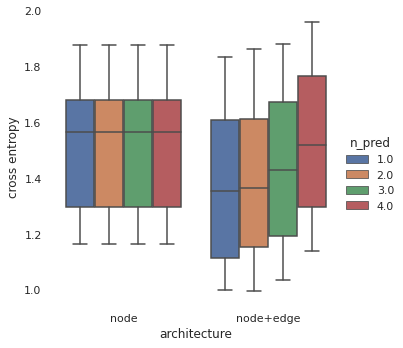

In [21]:
df = metrics_df.copy()

focus = [*labels, 'n_pred']

w = (
    (df['name'] == 'log_loss') &
    (df['set'] == 'test') &
    (df['shuffle_feature'] == 'none')
)
df = df[w].copy()
w_max = (df['epoch'] > (0.8 * df['epoch'].max()))
df = df[w_max].copy()


fg = sns.catplot(
    data=df, 
    y='value',
    x=focus[0] if len(focus) >= 1 else None, 
    hue=focus[1] if len(focus) >= 2 else None,
    col=focus[2] if len(focus) >= 3 else None, 
    row=focus[3] if len(focus) >= 4 else None, 
    kind='box')

fg.set(ylabel='cross entropy')

fg.savefig(os.path.join(plot_folder, 'cross_entropy_box_npred.jpg'))

node vs. node+edge: t-test paired samples, P_val:3.171e-03 t=3.987e+00


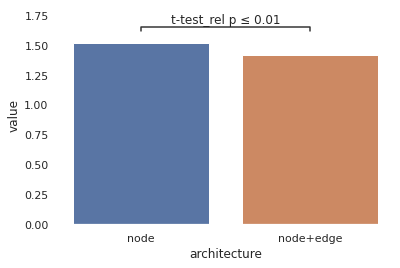

In [22]:
df = metrics_df.copy()

from statannotations.Annotator import Annotator

w = (
    (df['name'] == 'log_loss') &
    (df['set'] == 'test') &
    (df['shuffle_feature'] == 'none')
)
df = df[w].copy()
w_max = (df['epoch'] > (0.8 * df['epoch'].max()))
df = df[w_max].copy()

dfm = df.groupby([*labels, 'cv_split'])['value'].mean().reset_index()
dfm['mean_value'] = df.groupby(labels)['value'].transform('mean')

dfm[labels[0]] = dfm[labels[0]].astype(str)


ax = sns.barplot(
    data=dfm, 
    order=order,
    y='value',
    x=labels[0],
    errorbar=None
)
if pairs is not None:
    annotator = Annotator(ax, pairs, data=dfm, x=labels[0], y='value', order=order)
    annotator.configure(test=test, text_format='simple', loc='inside')
    annotator.apply_and_annotate()

plt.savefig(os.path.join(plot_folder, 'model_comparision.jpg'))

In [33]:
df = metrics_df.copy()

w = (
    (df['name'] == 'log_loss') &
    (df['set'] == 'test') 
)
df = df[w].copy()

df_p = df.pivot(index=[*labels, 'mask', 'name', 'cv_split', 'set', 'epoch'], columns='shuffle_feature', values='value')
df_p = df_p.sub(df_p['none'], axis=0)
df_p = df_p.stack()
df_p.name = 'value'
df_p = df_p.reset_index()
df_p = df_p[df_p['shuffle_feature'].isin(['prev_contribution', 'prev_punishment', 'prev_contribution_valid'])]

KeyError: 'none'

In [32]:
df_p

shuffle_feature                                 contribution  \
architecture mask name     cv_split set  epoch                 
node         NaN  log_loss 0.0      test 0          3.528594   
                                         50         3.275463   
                                         100        3.014091   
                                         150        2.732862   
                                         200        2.445525   
...                                                      ...   
node+edge    NaN  log_loss 9.0      test 9800       2.250631   
                                         9850       2.196425   
                                         9900       1.622535   
                                         9950       2.143994   
                                         9999       2.237342   

shuffle_feature                                 contribution_valid  \
architecture mask name     cv_split set  epoch                       
node         NaN  log_loss 0.0      test 0                3.521374   
                                         50               3.272692   
                                         100              3.004195   
                                         150              2.704183   
                                         200              2.426771   
...                                                            ...   
node+edge    NaN  log_loss 9.0      test 9800             1.804633   
                                         9850             1.781369   
                                         9900             1.852943   
                                         9950             1.883087   
                                         9999             1.747020   

shuffle_feature                                 prev_punishment  \
architecture mask name     cv_split set  epoch                    
node         NaN  log_loss 0.0      test 0             3.519856   
                                         50            3.272638   
                                         100           3.006703   
                                         150           2.705515   
                                         200           2.428057   
...                                                         ...   
node+edge    NaN  log_loss 9.0      test 9800          1.774684   
                                         9850          1.736721   
                                         9900          1.744559   
                                         9950          1.741869   
                                         9999          1.805366   

shuffle_feature                                 prev_punishment_valid  \
architecture mask name     cv_split set  epoch                          
node         NaN  log_loss 0.0      test 0                   3.521673   
                                         50                  3.271530   
                                         100                 3.008817   
                                         150                 2.707571   
                                         200                 2.428963   
...                                                               ...   
node+edge    NaN  log_loss 9.0      test 9800                1.718445   
                                         9850                1.725897   
                                         9900                1.741379   
                                         9950                1.704213   
                                         9999                1.737624   

shuffle_feature                                 punishment_masked  
architecture mask name     cv_split set  epoch                     
node         NaN  log_loss 0.0      test 0               3.520927  
                                         50              3.275379  
                                         100             3.008474  
                                         150             2.708431  
                          

In [26]:
focus = ['shuffle_feature']

sel = {
    'name': 'log_loss',
    'set': 'test',
    **selection
}

w = pd.concat(
    (df_p[k].isin(v) if isinstance(v, list) else df_p[k] == v
    for k,v in sel.items()
    if (k not in focus) or isinstance(v, list)), axis=1
).all(1)


dfs = df_p[w].copy()

ax = sns.barplot(
    data=df_p, 
    x='shuffle_feature', y='value',
    errorbar=None
)

ax.set(ylabel='loss in cross entropy', xlabel='shuffled feature')

plt.savefig(os.path.join(plot_folder, 'shuffle_feature_importance.jpg'))

ValueError: min() arg is an empty sequence